In [37]:
%matplotlib inline

In [38]:
import warnings
warnings.filterwarnings('ignore')

## Project Title :  Expresso Churn Prediction Challenge from Zindi

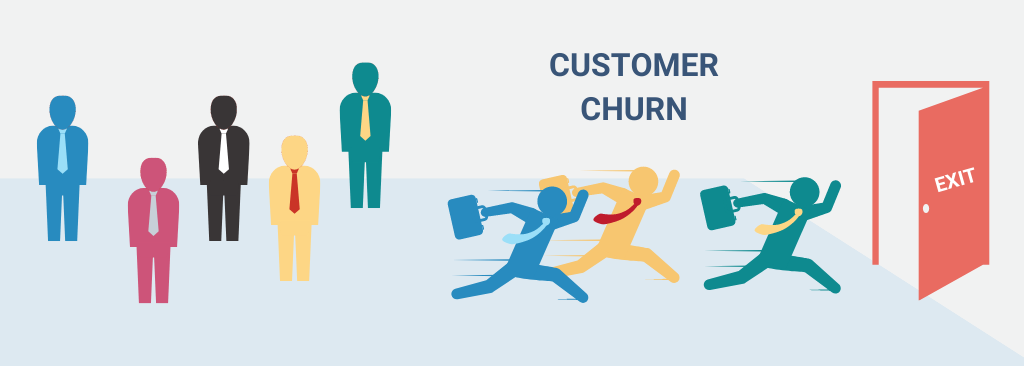

Goal : <br/>
Predict Expresso customer churn <br/>
Dataset source : Zindi


Project Structure  : <br/>
1. Importing the dataset
2. EDA
3. Data visualization
4. Data preprocessing + Feature engineering
5. Splitting the data into train and test
6. Model Selection + Training
7. Hyperparameter Tuning
8. Model evaluation
9. Conclusions and insights
  

- Dataset importing

In [39]:
import pandas as pd
df=pd.read_csv('Expresso_churn_dataset.csv')
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54.0,On net 200F=Unlimited _call24H,8.0,0.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4.0,NaN,NaN,1.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17.0,On-net 1000F=10MilF;10d,1.0,0.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62.0,"Data:1000F=5GB,7d",11.0,0.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11.0,Mixt 250F=Unlimited_call24H,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313871,2563461b4846f28e779be4bd03b1b78ec9ed4905,SAINT-LOUIS,K > 24 month,1500.0,2.0,1213.0,404.0,4.0,NaN,17.0,10.0,3.0,NaN,4.0,NO,17.0,All-net 500F=2000F;5d,2.0,0.0
313872,256346e467f279e7199132fb057a2ea5ffc0627a,KAFFRINE,K > 24 month,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NO,4.0,NaN,NaN,0.0
313873,256349762c7353be37633eaa201f0f423628444b,MATAM,K > 24 month,10500.0,21.0,10402.0,3467.0,22.0,0.0,337.0,142.0,NaN,NaN,NaN,NO,44.0,Jokko_Daily,18.0,0.0
313874,25634af7c7c3e5a4b623a8d9e022d13d3ec8bdfa,NaN,J 21-24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2.0,NaN,NaN,1.0


- Basic EDA

-- Dataset structure  

In [40]:
print(f'This dataset has {df.shape[0]} rows--> Instances  and {df.shape[1]} columns--> Features  ')

This dataset has 313876 rows--> Instances  and 19 columns--> Features  


-- The first five instances of this dataset

In [41]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54.0,On net 200F=Unlimited _call24H,8.0,0.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4.0,NaN,NaN,1.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17.0,On-net 1000F=10MilF;10d,1.0,0.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62.0,"Data:1000F=5GB,7d",11.0,0.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11.0,Mixt 250F=Unlimited_call24H,2.0,0.0


-- Some information about this dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313876 entries, 0 to 313875
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         313876 non-null  object 
 1   REGION          190180 non-null  object 
 2   TENURE          313876 non-null  object 
 3   MONTANT         203571 non-null  float64
 4   FREQUENCE_RECH  203571 non-null  float64
 5   REVENUE         208040 non-null  float64
 6   ARPU_SEGMENT    208040 non-null  float64
 7   FREQUENCE       208040 non-null  float64
 8   DATA_VOLUME     159304 non-null  float64
 9   ON_NET          199067 non-null  float64
 10  ORANGE          183249 non-null  float64
 11  TIGO            126027 non-null  float64
 12  ZONE1           24767 non-null   float64
 13  ZONE2           19921 non-null   float64
 14  MRG             313875 non-null  object 
 15  REGULARITY      313875 non-null  float64
 16  TOP_PACK        182454 non-null  object 
 17  FREQ_TOP_P

In [43]:
t=list(df.dtypes.values)
print('The majority of the features are of type', *set([i for i in t if t.count(i)==max(t.count(j) for j in t) ]))

The majority of the features are of type float64


-- Some statistics about numerical features

In [44]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,203571.000000,203571.000000,208040.000000,208040.000000,208040.000000,159304.000000,199067.000000,183249.000000,126027.000000,24767.000000,19921.000000,313875.000000,182454.000000,313875.000000
mean,5555.949944,11.576094,5526.023217,1842.013743,14.014468,3365.678539,278.083515,96.114494,23.186968,8.149756,7.317504,28.048147,9.305792,0.187090
std,7150.371588,13.309514,7145.293917,2381.761058,14.723757,12323.377114,872.511801,206.784573,62.828220,40.483705,30.172661,22.282962,12.323369,0.389985
min,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.000000
50%,3000.000000,7.000000,3001.000000,1000.000000,9.000000,264.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.000000
75%,7400.000000,16.000000,7400.000000,2467.000000,20.000000,2902.000000,158.000000,99.000000,21.000000,4.000000,5.000000,51.000000,12.000000,0.000000
max,290500.000000,133.000000,221999.000000,74000.000000,91.000000,926547.000000,50809.000000,6429.000000,2899.000000,1867.000000,1346.000000,62.000000,592.000000,1.000000


-- Generating a ydata_profiling report  

In [45]:
!pip install ydata_profiling

In [46]:
from ydata_profiling import ProfileReport
p=ProfileReport(df)
p.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 19/19 [00:19<00:00,  1.01s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

> **Observations concluded from Profile Report :** <br/>
**Missing values :** <br/>
The 35.1% of data is missing (NaN). <br/>
15/19 columns have missing values . <br/>
ZONE1 has 176803 (92.1%) missing values and ZONE2 has 179704 (93.6%) missing values. => They are ought to be deleted . <br/>
**High correlations :** <br/>
ARPU_SEGMENT and FREQUENCE are highly overall correlated  . <br/>
CHURN is highly overall correlated with REGULARITY . <br/>
FREQUENCE_RECH is highly overall correlated with ARPU_SEGMENT. <br/>
FREQ_TOP_PACK is highly overall correlated with ARPU_SEGMENT . <br/>
MONTANT is highly overall correlated with ARPU_SEGMENT . <br/>
ON_NET is highly overall correlated with ARPU_SEGMENT . <br/>
ORANGE is highly overall correlated with ARPU_SEGMENT . <br/>
REGULARITY is highly overall correlated with ARPU_SEGMENT . <br/>
REVENUE is highly overall correlated with ARPU_SEGMENT . <br/>
==> Strategies for working with highly correlated values will be implemented in the feature engineering phase .
**Zeros :**<br/>
DATA_VOLUME ,ON_NET ,ORANGE,TIGO,ZONE1 and ZONE2 have zeros . <br/>
**Data variability :** <br/>
MRG has constant value "False". (going to be deleted because it doesn't influence the target) <br/>
TENURE is highly imbalanced (86.5%) .<br/>
DATA_VOLUME is highly skewed (γ1 = 29.80659246) <br/>
ZONE1 is highly skewed (γ1 = 20.15447396) .<br/>
==> data that is skewed needs to be treated seperately using log or square root transformation + standardization  .<br/>










-- Some Visualizations to investigate the data

- Churn distribution

In [47]:
import plotly.express as px
fig=px.pie(df['CHURN'],names='CHURN',title='Distribution of churn',template='plotly_dark')
fig.show()

- The majority of class value is 0 --> The majority of clients are likely to not churn.

- Relationship between MONTANT and CHURN

In [48]:
data=df.groupby('CHURN')['MONTANT'].mean().reset_index()
data['CHURN']=data['CHURN'].astype(str)
fig1=px.bar(data,x='CHURN',y='MONTANT',title='AVERAGE MONTANT(AMOUNT) RELATED TO CHURN ',color='MONTANT',template='plotly_dark')
fig1.show()

- Average MONTANT of instances in class 0 (CHURN=0) is around 5710 higher than Average MONTANT of instances in class 1 (CHURN=1) around 2260.

- Relationship between CHURN and REVENUE (monthly revenue of the client)

In [49]:
data=df.groupby('CHURN')['REVENUE'].mean().reset_index()
data['CHURN']=data['CHURN'].astype(str)
fig2=px.bar(data,x='CHURN',y='REVENUE',title='AVERAGE REVENUE(CLIENT REVENUE) RELATED TO CHURN ',color='REVENUE',template='plotly_dark')
fig2.show()

- Average REVENUE of instances in class 0 (CHURN=0) is around 5712 higher than Average REVENUE of instances in class 1 (CHURN=1) around 2070.

- Distribution of CHURN Per REGION

In [50]:
data=df.groupby('REGION')['CHURN'].count().reset_index()
fig=px.bar(data,x='REGION',y='CHURN',color='REGION',title='Distribution of CHURN Per REGION',template='plotly_dark')
fig.show()

- CHURN is most commun in DAKAR region .
- CHURN is least commun in KEDOUGOU region.

- Variation of regularity related to churn

In [51]:
data=df.groupby('CHURN')['REGULARITY'].mean().reset_index()
data['CHURN']=data['CHURN'].astype(str)
fig=px.bar(data,x='CHURN',y='REGULARITY',color='CHURN',title='Distribution of CHURN Per REGULARITY',template='plotly_dark')
fig.show()

- Average Regularity is around 33.19 when churn is 0 substantially higher than of class 1 5.77 .

- Correlation between features

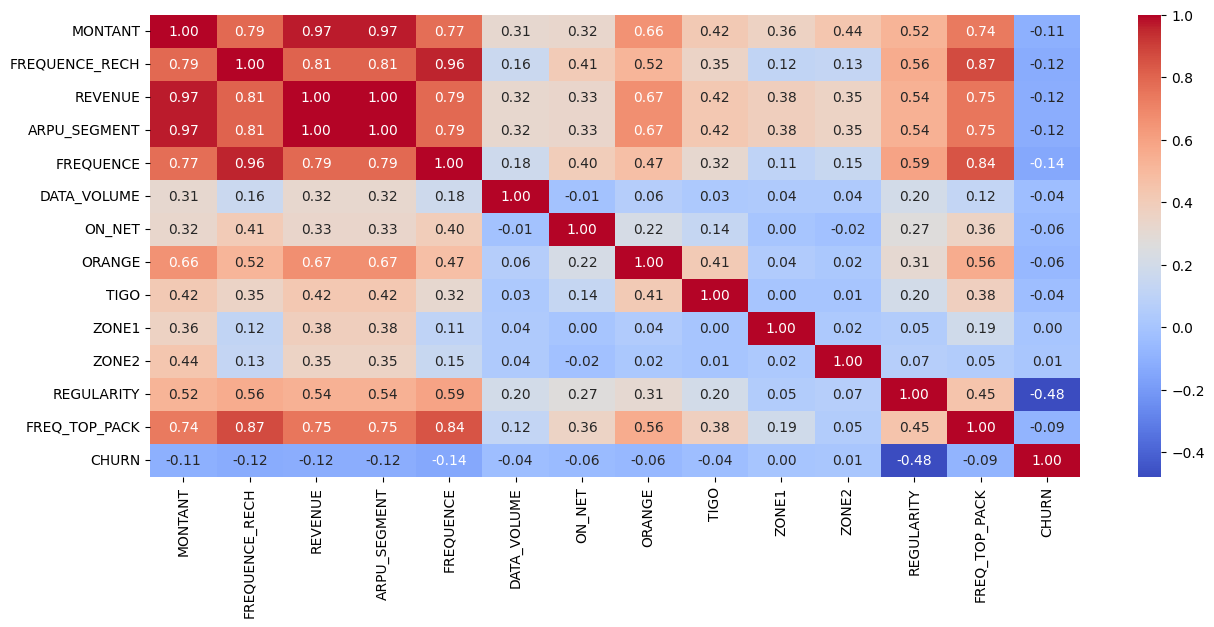

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
corelation_matrix=df.corr(numeric_only=True)
sns.heatmap(corelation_matrix,cmap='coolwarm',fmt='.2f',annot=True)
plt.show()

- **Insights from the correlation table :** <br/>
 1. High correlations between MONTANT , FREQUENCE_RECH , REVENUE,APRU_SEGMENT <br/>and FREQUENCE . -> possibility of combining them into one feature thus <br/>reducing computations making the model later on work efficiently . <br/>
 2. All features are either reversely correlated to target or not correlated at<br/> all . -> Doesn't harm model's work later on  so we are just going to <br/>note this observation .

- Data Cleaning


-- Dropping the MRG column because its value is always "False"

In [53]:
df=df.drop(columns=['MRG','ZONE1','ZONE2'])

-- Handling missing values

In [54]:
for i in df.columns :
  if df[i].dtype in ["float64","int64"]:
    df[i].fillna(value=df[i].median(),inplace=True)
  else :
    df[i].fillna(value=df[i].mode()[0],inplace=True)

-- Removing duplicates

In [55]:
df=df.drop_duplicates()

-- Handling outliers

In [56]:
q1={}
q3={}
outliers={}
for i in df.columns :
  if df[i].dtype in ['float64','int64']:
    q1[i]=df[i].quantile(0.25)
    q3[i]=df[i].quantile(0.75)
    iqr=q3[i]-q1[i]
    outliers[i]=df[(df[i]>=q3[i]+iqr*1.5)|(df[i]<=q1[i]-1.5*iqr)]
    print(f'The percentage of outliers in {i} columns is {len(outliers[i])*100/len(df):.2f}%')


The percentage of outliers in MONTANT columns is 13.86%
The percentage of outliers in FREQUENCE_RECH columns is 13.30%
The percentage of outliers in REVENUE columns is 13.34%
The percentage of outliers in ARPU_SEGMENT columns is 13.34%
The percentage of outliers in FREQUENCE columns is 13.01%
The percentage of outliers in DATA_VOLUME columns is 47.70%
The percentage of outliers in ON_NET columns is 18.01%
The percentage of outliers in ORANGE columns is 18.18%
The percentage of outliers in TIGO columns is 100.00%
The percentage of outliers in REGULARITY columns is 0.00%
The percentage of outliers in FREQ_TOP_PACK columns is 31.38%
The percentage of outliers in CHURN columns is 100.00%


-- Dealing with outliers

In [57]:
import numpy as np
l=df.select_dtypes(include=[np.number]).columns
for i in l:
    q1, q3 = df[i].quantile(0.25), df[i].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    if i in ['TENURE','FREQUENCE_RECH','FREQUENCE','REGULARITY','ON_NET','ORANGE','TIGO','FREQ_TOP_PACK']:
        df = df[(df[i] >= lower) & (df[i] <= upper)]

for i in ['REVENUE','MONTANT','ARPU_SEGMENT','DATA_VOLUME']:
    df[i] = np.log1p(df[i])

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    top_categories = df[col].value_counts().nlargest(10).index
    df[col] = np.where(df[col].isin(top_categories), df[col], 'Other')
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1,Other,DAKAR,I 18-21 month,8.006701,7.0,8.007034,6.908755,9.0,5.579730,27.0,29.0,6.0,4.0,All-net 500F=2000F;5d,5.0,1.0
6,Other,LOUGA,K > 24 month,8.006701,7.0,8.007034,6.908755,9.0,5.579730,27.0,29.0,6.0,2.0,All-net 500F=2000F;5d,5.0,0.0
10,Other,DAKAR,K > 24 month,5.303305,1.0,8.007034,6.908755,9.0,5.579730,27.0,29.0,6.0,1.0,All-net 500F=2000F;5d,5.0,0.0
12,Other,DAKAR,G 12-15 month,8.006701,7.0,8.007034,6.908755,9.0,5.579730,27.0,29.0,6.0,2.0,All-net 500F=2000F;5d,5.0,1.0
13,Other,THIES,K > 24 month,8.006701,7.0,0.693147,0.000000,1.0,5.579730,27.0,29.0,6.0,26.0,All-net 500F=2000F;5d,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313859,Other,DAKAR,J 21-24 month,8.006701,7.0,8.007034,6.908755,9.0,5.579730,27.0,29.0,6.0,1.0,All-net 500F=2000F;5d,5.0,0.0
313866,Other,FATICK,K > 24 month,8.006701,7.0,8.007034,6.908755,9.0,5.579730,27.0,29.0,6.0,2.0,All-net 500F=2000F;5d,5.0,0.0
313872,Other,KAFFRINE,K > 24 month,8.006701,7.0,8.007034,6.908755,9.0,2.079442,27.0,29.0,6.0,4.0,All-net 500F=2000F;5d,5.0,0.0
313874,Other,DAKAR,J 21-24 month,8.006701,7.0,8.007034,6.908755,9.0,5.579730,27.0,29.0,6.0,2.0,All-net 500F=2000F;5d,5.0,1.0


-- Enocoding categorical values :


In [58]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in filter(lambda x: df[x].dtype == 'object', df.columns):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

- Feature Engineering

AS the results shown in the previous parts (EDA) This dataset contains a lot of correlated features which can lead to high computational loss . Therefore we are going to implement various features in order to improve model's efficiency .


-- Starting by calculating Mutual information scores for all features and order them to see how much each feature tells us about the target variable CHURN

In [59]:
from sklearn.feature_selection import mutual_info_classif
X=df.drop(columns=['CHURN','user_id'])
y=df['CHURN']
mi_scores=mutual_info_classif(X,y)
mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print('the 5 most features that tell you the most about churn are ',*dict(zip(list(mi_df.index),list(iter(mi_df))[:5])).keys())

the 5 most features that tell you the most about churn are  REGULARITY REGION ON_NET DATA_VOLUME FREQUENCE


- We might decide to eliminate the others but lets just train the classifier with all the info first and then eliminate the non informative features later and see which one gives better results .

- Splitting the data into train and test

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.4)

- Model Selection + Training

In [61]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(X_train,y_train)
y_pred=l.predict(X_test )
print(f'LogisticRegression classifier : \nAccuracy : { accuracy_score(y_test, y_pred):.2f} \nF1_score: {f1_score(y_test, y_pred):.2f}')


LogisticRegression classifier : 
Accuracy : 0.71 
F1_score: 0.71


In [62]:

from sklearn.ensemble import RandomForestClassifier
Rcl=RandomForestClassifier(n_estimators=100, random_state=42)
Rcl.fit(X_train,y_train)
y_pred=Rcl.predict(X_test)
print(f'Random forest classifier : \nAccuracy : { accuracy_score(y_test, y_pred):.2f} \nF1_score: {f1_score(y_test, y_pred):.2f}')

Random forest classifier : 
Accuracy : 0.71 
F1_score: 0.69


In [63]:
from xgboost import XGBClassifier
xg=XGBClassifier(eval_metric='logloss', random_state=42)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
print(f'XGBoost classifier : \nAccuracy : { accuracy_score(y_test, y_pred):.2f} \nF1_score: {f1_score(y_test, y_pred):.2f}')

XGBoost classifier : 
Accuracy : 0.72 
F1_score: 0.69


- The best amongst them is xgboost in terms of accuracy and the best according to F1_score is logistic regression .

- Trying Hyperparameter tuning between xgboost and logistic regression

- Logistic regression hyperparameter tuning

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
param_rand={'C':[0.01,0.1,1,2,3],'penalty':['l1','l2','elasticnet','none'],'solver':['liblinear','saga']}
r=RandomizedSearchCV(l,param_rand,cv=5,scoring='f1',n_jobs=-1)
r.fit(X_train,y_train)
print(r.best_params_)
y_pred=r.predict(X_test)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}


In [65]:
l=LogisticRegression(**r.best_params_)
l.fit(X_train,y_train)
y_pred1=l.predict(X_test)
print(f'LogisticRegression classifier + Randomized Search hyperparameter tuning   : \nAccuracy : { accuracy_score(y_test, y_pred1):.2f} \nF1_score: {f1_score(y_test, y_pred1):.2f}')


LogisticRegression classifier + Randomized Search hyperparameter tuning   : 
Accuracy : 0.71 
F1_score: 0.71


- Xgboost hyperparameter tuning

In [66]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}
random_xgb = RandomizedSearchCV(xg, params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
random_xgb.fit(X_train,y_train)
y_pred=random_xgb.predict(X_test)
print(random_xgb.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [67]:
xg=XGBClassifier(**random_xgb.best_params_)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
print(f'XGBoost classifier +  Randomized Search hyperparameter tuning  : \nAccuracy : { accuracy_score(y_test, y_pred):.2f} \nF1_score: {f1_score(y_test, y_pred):.2f}')

XGBoost classifier +  Randomized Search hyperparameter tuning  : 
Accuracy : 0.72 
F1_score: 0.69


- We are going to use the model with the higher f1_score(since it indicates truely how well the model is doing in both majority and minority class ) so it is going to be the Logistic regression model .

- Model evaluation

-- Classification report

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

         0.0       0.64      0.79      0.71     19867
         1.0       0.79      0.64      0.71     24364

    accuracy                           0.71     44231
   macro avg       0.72      0.72      0.71     44231
weighted avg       0.72      0.71      0.71     44231



-- Confusion matrix

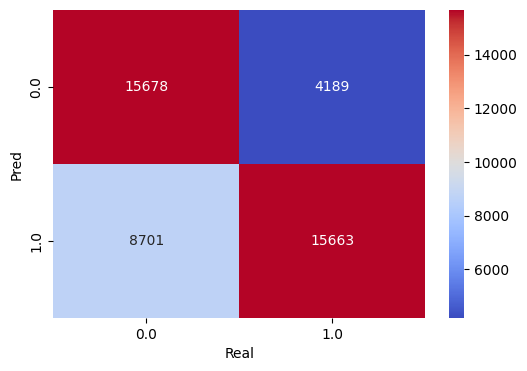

In [69]:
conf_matrix=pd.crosstab(y_pred1,y_test,colnames=['Real'],rownames=['Pred'])
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,cmap='coolwarm',annot=True,fmt='d')
plt.show()

- Conclusions : <br/>
After this whole pipeline we have conducted that the best solution is logistic regression for predicting churn here with an accuracy of 71% and an f1_score of 0.71. These measures signify that there should be some measures that needs to be implemeted in order to find better models with higher performances in order to solve this problem .

- Registering Model for streamlit application

In [70]:
import pickle
with open('LogisticRegression_model.pkl', 'wb') as f:
    pickle.dump((l,encoders), f)